In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import plot_precision_recall_curve

In [3]:
model_name = "jigsaw"
metric = "cosim"
dir = Path("data/" + model_name)
file_name = "sim_mat_" + metric + ".torch"
sim_mat = torch.load(dir / file_name)
labels = list()
with open(dir / "embedding_gallary_labels.txt", "r") as f:
    labels = f.read().splitlines()

In [4]:
sim_mat_np = sim_mat.numpy()
labels_np = np.array(labels)

Average precision is 0.5875959079283888


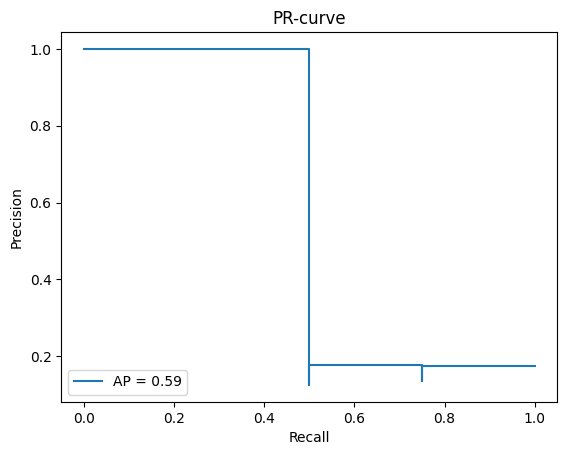

In [5]:
idx = 1642
#y_true contains the ground truth for classification (True if label of query is the same)
#gallary labels == query label (query is on the diagonal so the i th element of the i th row)
y_true = labels_np == labels_np[idx] 
y_score = sim_mat_np[idx] 
#compute AP
AP = average_precision_score(y_true=y_true, y_score=y_score, pos_label=1)
print(f"Average precision is {AP}")
#compute PR-curve
precision, recall, thresholds = precision_recall_curve(y_true=y_true, probas_pred=y_score, pos_label=1)

display = PrecisionRecallDisplay(recall=recall, precision=precision, average_precision=AP)
display.plot()
_ = display.ax_.set_title("PR-curve")


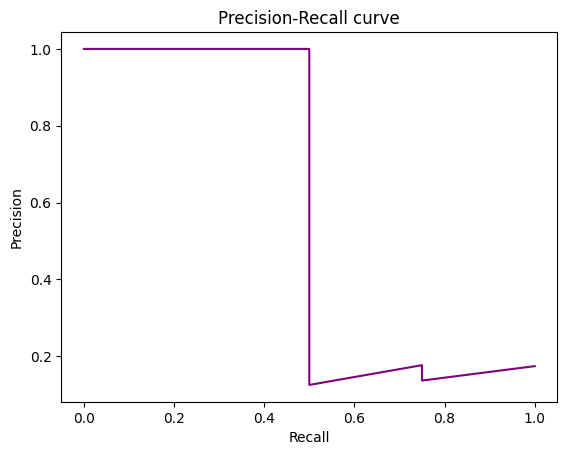

In [6]:
idxs = [range(1000,1010)]
fig, ax = plt.subplots()
for idx in idxs:
    #compute PR-curve
    precision, recall, thresholds = precision_recall_curve(y_true=y_true, probas_pred=y_score, pos_label=1)

    #create precision recall curve
    ax.plot(recall, precision, color='purple')

    #add axis labels to plot
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')


plt.title('Precision-Recall curve')
plt.show()